Goal: Simulate and analyze key metrics across school districts:

- Student-to-teacher ratios
- Funding per student
- Composite stress scores
- Visualizations that inform planning decisions

In [2]:
# self populated District-Level Dataset
import pandas as pd

districts = pd.DataFrame([
    {"district_name": "Delta SD",      "region": "West Coast",    "total_students": 8700,  "num_teachers": 520, "budget": 32_000_000},
    {"district_name": "Prairie Hills", "region": "Central",       "total_students": 4300,  "num_teachers": 250, "budget": 15_000_000},
    {"district_name": "Maple Creek",   "region": "North",         "total_students": 1200,  "num_teachers": 85,  "budget": 6_800_000},
    {"district_name": "Lakeside SD",   "region": "West Coast",    "total_students": 6100,  "num_teachers": 340, "budget": 22_000_000},
    {"district_name": "Sun Valley",    "region": "South",         "total_students": 3800,  "num_teachers": 190, "budget": 10_500_000},
])
print(districts.head())

   district_name      region  total_students  num_teachers    budget
0       Delta SD  West Coast            8700           520  32000000
1  Prairie Hills     Central            4300           250  15000000
2    Maple Creek       North            1200            85   6800000
3    Lakeside SD  West Coast            6100           340  22000000
4     Sun Valley       South            3800           190  10500000


Column	Description
- district_name	: School district name (e.g. Delta SD)
- total_students :	Total number of enrolled students
- num_teachers :	Number of teachers in district
- budget :	Total annual funding (in local currency)
- region :	Geographic region (e.g. West Coast)

This will calculate
- students_per_teacher = total_students / num_teachers
- funding_per_student = budget / total_students
- Composite stress score based on these values

In [3]:
# calculate key matric
# Student-Teacher Ratio
districts["students_per_teacher"] = districts["total_students"] / districts["num_teachers"]
print(districts.head())

# Funding Per Student
districts["funding_per_student"] = districts["budget"] / districts["total_students"]
print(districts.head())

# Composite Stress Score (higher = more strain)
districts["stress_score"] = (
    0.5 * (districts["students_per_teacher"] / districts["students_per_teacher"].max()) +
    0.5 * (1 - districts["funding_per_student"] / districts["funding_per_student"].max())
)
print(districts.head())

   district_name      region  total_students  num_teachers    budget  \
0       Delta SD  West Coast            8700           520  32000000   
1  Prairie Hills     Central            4300           250  15000000   
2    Maple Creek       North            1200            85   6800000   
3    Lakeside SD  West Coast            6100           340  22000000   
4     Sun Valley       South            3800           190  10500000   

   students_per_teacher  
0             16.730769  
1             17.200000  
2             14.117647  
3             17.941176  
4             20.000000  
   district_name      region  total_students  num_teachers    budget  \
0       Delta SD  West Coast            8700           520  32000000   
1  Prairie Hills     Central            4300           250  15000000   
2    Maple Creek       North            1200            85   6800000   
3    Lakeside SD  West Coast            6100           340  22000000   
4     Sun Valley       South            3800       

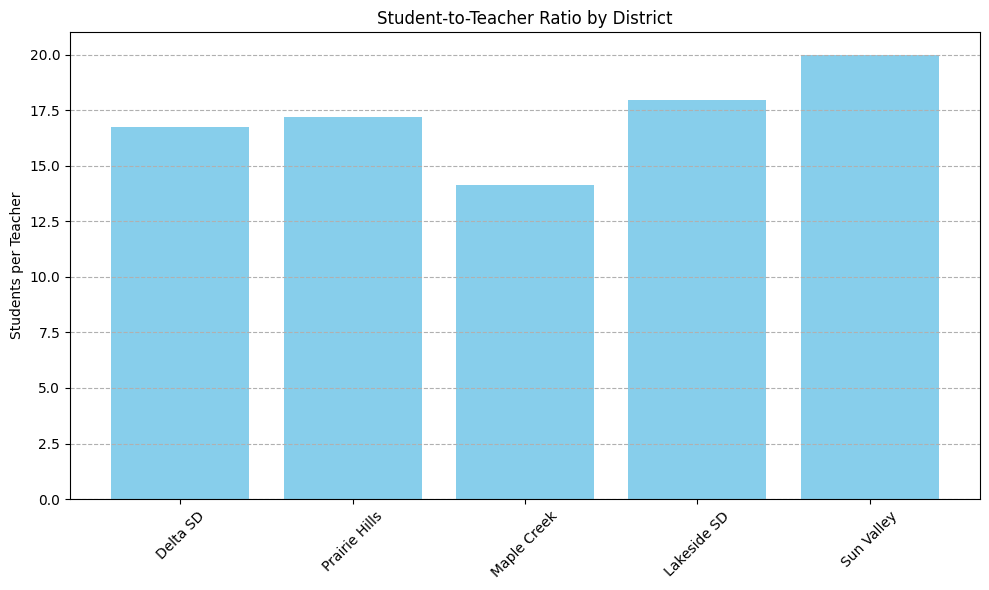

In [4]:
# visualize student teacher ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(districts["district_name"], districts["students_per_teacher"], color="skyblue")
plt.title("Student-to-Teacher Ratio by District")
plt.ylabel("Students per Teacher")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()


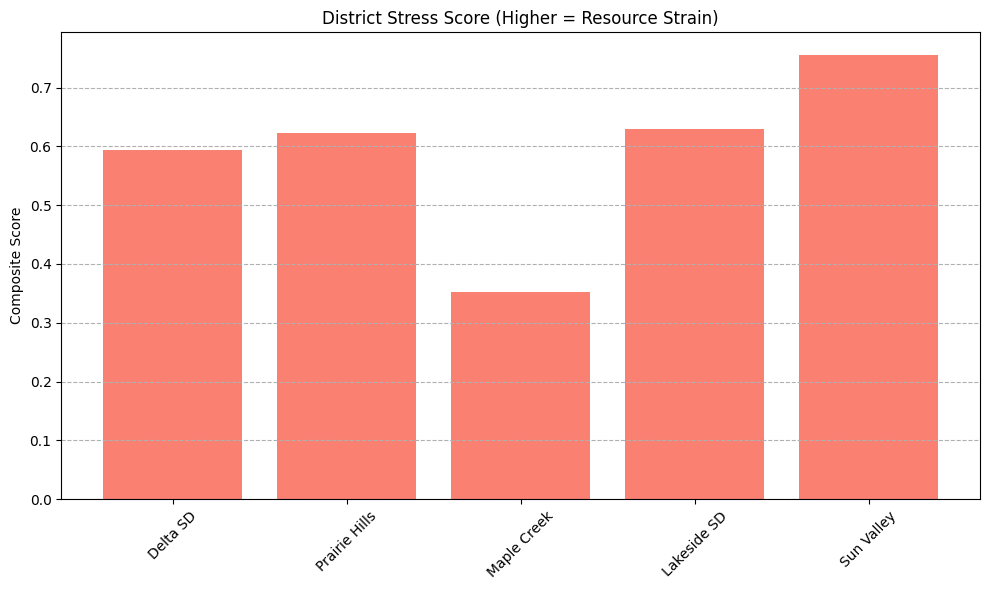

In [5]:
# visualize stress score
plt.figure(figsize=(10,6))
plt.bar(districts["district_name"], districts["stress_score"], color="salmon")
plt.title("District Stress Score (Higher = Resource Strain)")
plt.ylabel("Composite Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()


Delta SD shows higher stress due to classroom crowding despite strong budget.

Maple Creek is balanced — small size yields lower strain per resource unit.

Sun Valley may benefit most from targeted funding increase given its high ratio and moderate budget.